# Práctica 4

In [1]:
import scipy.integrate as integrate
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1

### Pregunta A

In [2]:
def f(y, x):
    if (2 <= x <= 3) and (2 <= y <= 3):
        return 3/38 * (x**2 + y**2)
    else:
        return 0

In [3]:
scipy.integrate.dblquad(f, -np.inf, np.inf, -np.inf, np.inf)

(0.9999999999999796, 1.6809671432582718e-09)

### Pregunta B

In [4]:
integrate.dblquad(f, 2, 2.6, 2, 2.6)

(0.30240000000000006, 6.3492510574090725e-15)

In [5]:
1+np.e**(-2000) * 2000

1.0

### Ejercicio 7

In [6]:
def fx(x):
    if (2 <= x <= 3):
        return 3/38 * (x**2 + 19/3)
    else:
        return 0

def fy(y):
    if (2 <= y <= 3):
        return 3/38 * (y**2 + 19/3)
    else:
        return 0

In [7]:
# Busco A y B tales que f sea distinto a fx * fy
A = [2, 2.3]
B = [2, 2.3]
x1 = integrate.quad(fx,A[0], A[1])[0]
x2 = integrate.quad(fy,B[0], B[1])[0]
print(x1 * x2)
print(integrate.dblquad(f,A[0],A[1],B[0],B[1])[0])

0.06742222229916887
0.06579473684210518


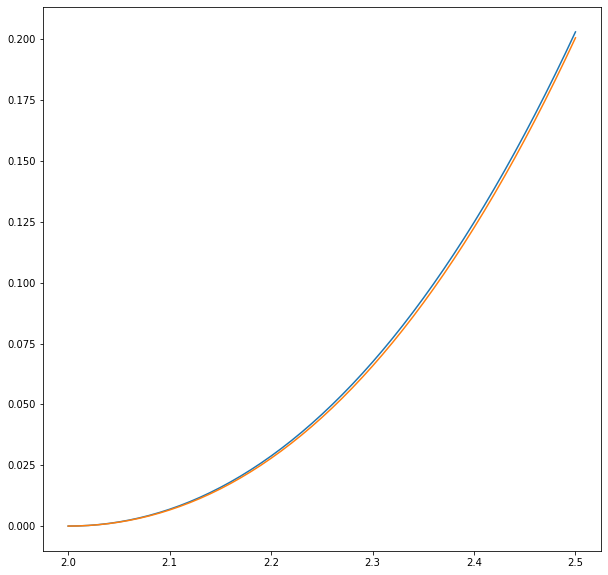

In [8]:
# Se debería ver tambien en el plot
A = [2, 2]
xs, ys, ysp = [], [], []

while A[1] <= 2.5:
    x1 = integrate.quad(fx,A[0], A[1])[0]
    x2 = integrate.quad(fy,A[0], A[1])[0]
    ys.append(x1 * x2)
    ysp.append(integrate.dblquad(f,A[0],A[1],A[0],A[1])[0])
    xs.append(A[1])
    A[1] += .01

plt.figure(figsize=(10,10))
plt.plot(xs, ys)
plt.plot(xs, ysp)

## Ejercicio 8

In [17]:
# Distribución de Y|X=a
X = scipy.stats.binom(3,1/2)
for x in range(4):
    Y = scipy.stats.hypergeom(5,1,x+1)
    for y in range(2):
        print("P(Y={} | X={}) = {}".format(y,x,round(Y.pmf(y),4)))

P(Y=0 | X=0) = 0.8
P(Y=1 | X=0) = 0.2
P(Y=0 | X=1) = 0.6
P(Y=1 | X=1) = 0.4
P(Y=0 | X=2) = 0.4
P(Y=1 | X=2) = 0.6
P(Y=0 | X=3) = 0.2
P(Y=1 | X=3) = 0.8


In [19]:
# Distribución conjunta (X,Y)
X = scipy.stats.binom(3,1/2)
for x in range(4):
    Y = scipy.stats.hypergeom(5,1,x+1)
    for y in range(2):
        print("P(Y={} | X={}) * P(X={}) = {}".format(y,x,x,round(Y.pmf(y)*X.pmf(x),4)))

P(Y=0 | X=0) * P(X=0) = 0.1
P(Y=1 | X=0) * P(X=0) = 0.025
P(Y=0 | X=1) * P(X=1) = 0.225
P(Y=1 | X=1) * P(X=1) = 0.15
P(Y=0 | X=2) * P(X=2) = 0.15
P(Y=1 | X=2) * P(X=2) = 0.225
P(Y=0 | X=3) * P(X=3) = 0.025
P(Y=1 | X=3) * P(X=3) = 0.1


## Ejercicio 11

In [21]:
arr_ej = [(0,0,.1),(0,1,.025),(1,0,.225),(1,1,.15),(2,0,.15),(2,1,.225),(3,0,.025),(3,1,.1)]

In [ ]:
def cov_tabla(arr):
    for t in arr:
        

## Ejercicio 12

In [23]:
va = scipy.stats.multinomial(n=100,p=[.7,.12,.1,.08])

## Ejercicio 15

In [24]:
def norm_rango(mu=0, ds=1, desde=-np.inf, hasta=np.inf):
    va = scipy.stats.norm(mu, ds)
    return va.cdf(hasta) - va.cdf(desde)

In [30]:
pa = norm_rango(mu=5, ds=0.5, hasta=4)

In [31]:
pb = norm_rango(mu=5, ds=0.5, desde=4 , hasta=4.8)

In [32]:
pc = norm_rango(mu=5, ds=0.5, desde=4.8 , hasta=5.5)

In [33]:
pd = norm_rango(mu=5, ds=0.5, desde=5.5)

In [34]:
va = scipy.stats.multinomial(n=40,p=[pa,pb,pc,pd])

In [38]:
va.pmf([1,13,18,8])

0.006251381180438276

## Ejercicio 17

In [41]:
def f(x):
    if 2 <= x <= 2.5:
        return x * 24 * (x-2)**2
    else:
        return 0

In [43]:
scipy.integrate.quad(f,-np.inf,np.inf)[0]

2.3749999999824802

## Ejercicio 19

In [44]:
va = scipy.stats.binom(25,0.1)
1-va.cdf(4)

0.09799362119546484

In [47]:
va = scipy.stats.hypergeom(25,14,2)
va.pmf(2)

0.3033333333333334